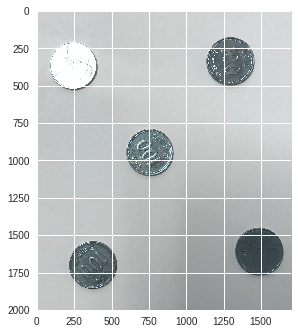

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ret = cv2.imread("IMG_8253.JPG")
roi = ret[1000:3000,800:2500]

plt.imshow(roi,'gray')

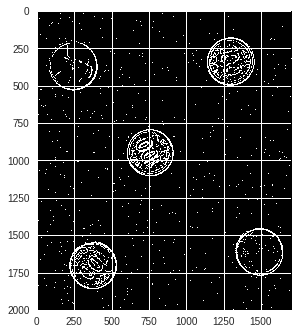

In [3]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (25, 25), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

plt.imshow(thresh,'gray')

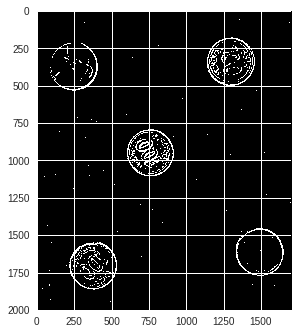

In [4]:
kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

plt.imshow(closing,'gray')

In [6]:
cont_img = closing.copy()
A,contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

circles = cv2.HoughCircles(closing, cv2.HOUGH_GRADIENT, 0.1, 120, param1 = 70, param2 = 30, minRadius = 100, maxRadius = 180)
circles_rnd = np.uint16(np.around(circles))

print(circles_rnd.shape)

(1, 5, 3)


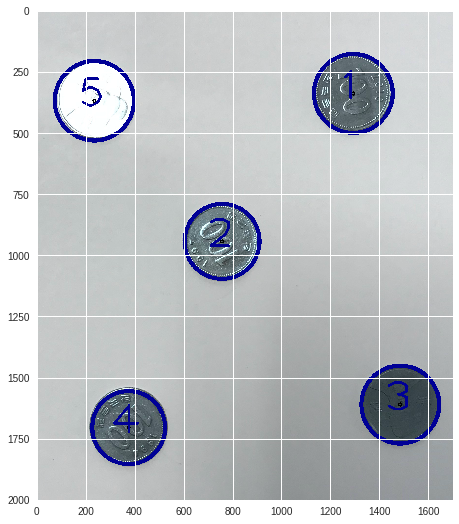

In [7]:
count = 1
for i in circles_rnd[0, :]:
    cv2.circle(roi, (i[0],i[1]),i[2],(0, 0, 150), 15)
    cv2.circle(roi, (i[0],i[1]),6,(0, 0, 0), 4)
    cv2.putText(roi, str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_PLAIN, 12, (0,0,150), 10)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(roi)